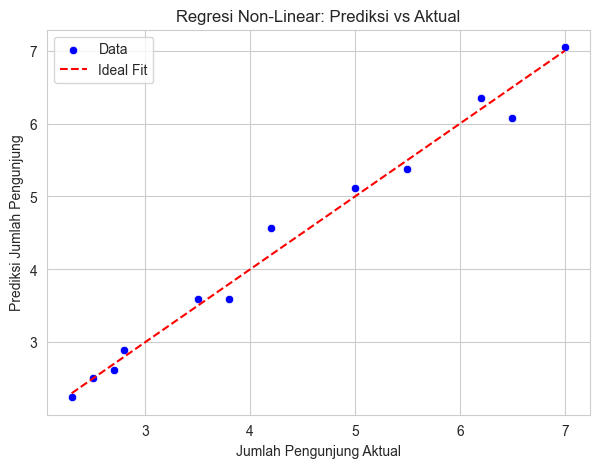

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

# Dataset
data = pd.DataFrame({
    "Suhu": [28, 30, 27, 25, 29, 32, 35, 26, 24, 31, 33, 28],
    "Curah_Hujan": [120, 100, 150, 200, 90, 80, 70, 180, 220, 95, 85, 140],
    "Anggaran_Promosi": [50, 60, 45, 30, 70, 85, 90, 40, 25, 75, 80, 50],
    "Hari_Libur": [2, 3, 1, 2, 3, 4, 5, 1, 2, 3, 4, 2],
    "Jumlah_Pengunjung": [3.5, 4.2, 2.8, 2.5, 5, 6.2, 7, 2.7, 2.3, 5.5, 6.5, 3.8]
})

# Fungsi model non-linear (kombinasi eksponensial dan polinomial)
def model_nonlinear(X, a, b, c, d, e):
    suhu, curah_hujan, anggaran, libur = X
    return a * np.exp(b * suhu) + c * np.log1p(curah_hujan) + d * anggaran + e * libur

# Menyiapkan data
X_data = np.array([data["Suhu"], data["Curah_Hujan"], data["Anggaran_Promosi"], data["Hari_Libur"]])
Y_data = np.array(data["Jumlah_Pengunjung"])

# Fitting model ke data
popt, _ = curve_fit(model_nonlinear, X_data, Y_data, maxfev=5000)

# Prediksi menggunakan model
predictions = model_nonlinear(X_data, *popt)

# Visualisasi hasil prediksi
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.scatterplot(x=Y_data, y=predictions, color="blue", label="Data")
sns.lineplot(x=Y_data, y=Y_data, color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Jumlah Pengunjung Aktual")
plt.ylabel("Prediksi Jumlah Pengunjung")
plt.title("Regresi Non-Linear: Prediksi vs Aktual")
plt.legend()
plt.show()
